In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate


In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

# # Load the augmented data from the saved file
# data = np.load('/content/drive/My Drive/Capstone/Pickled/coral_augmented_combined_RCNN.npz')

# # Access the arrays from the loaded data
# X_train = data['X_train']
# y_train = data['y_train']
# X_test = data['X_test']
# y_test = data['y_test']

# # Check the shape of the loaded data
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)

In [11]:
# Load the augmented data from the saved file
data = np.load('../data/external/coral_augmented_mask.npz')

# Access the arrays from the loaded data
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']
X_valid = data['X_valid']
y_valid = data['y_valid']

# Print the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (7488, 224, 224, 3)
y_train shape: (7488, 224, 224)
X_valid shape: (1880, 224, 224, 3)
y_valid shape: (1880, 224, 224)
X_test shape: (2344, 224, 224, 3)
y_test shape: (2344, 224, 224)


In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

def simplified_unet(input_shape=(224, 224, 3)):
    inputs = Input(input_shape)

    # Contracting Path
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    # Bottleneck
    bottleneck = Conv2D(128, 3, activation='relu', padding='same')(pool1)

    # Expansive Path
    up1 = Concatenate()([UpSampling2D(size=(2, 2))(bottleneck), conv1])
    conv2 = Conv2D(64, 3, activation='relu', padding='same')(up1)

    # Output layer
    outputs = Conv2D(1, 1, activation='sigmoid')(conv2)

    model = Model(inputs=inputs, outputs=outputs)

    return model

# Create the simplified U-Net model
model = simplified_unet()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_22 (Conv2D)             (None, 224, 224, 64  1792        ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 112, 112, 64  0          ['conv2d_22[0][0]']              
                                )                                                           

In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/10
234/234 [==============================] - 1953s 8s/step - loss: 1.5925 - accuracy: 0.6753 - val_loss: 0.6616 - val_accuracy: 0.6834
Epoch 2/10
234/234 [==============================] - 1963s 8s/step - loss: 0.6503 - accuracy: 0.6769 - val_loss: 0.6383 - val_accuracy: 0.6834
Epoch 3/10
234/234 [==============================] - 1926s 8s/step - loss: 0.6388 - accuracy: 0.6769 - val_loss: 0.6319 - val_accuracy: 0.6834
Epoch 4/10
234/234 [==============================] - 1944s 8s/step - loss: 0.6359 - accuracy: 0.6768 - val_loss: 0.6275 - val_accuracy: 0.6834
Epoch 5/10
234/234 [==============================] - 1951s 8s/step - loss: 0.6305 - accuracy: 0.6769 - val_loss: 0.6255 - val_accuracy: 0.6834
Epoch 6/10
234/234 [==============================] - 1952s 8s/step - loss: 0.6296 - accuracy: 0.6769 - val_loss: 0.6248 - val_accuracy: 0.6834
Epoch 7/10
234/234 [==============================] - 1938s 8s/step - loss: 0.6293 - accuracy: 0.6769 - val_loss: 0.6245 - val_accuracy:

In [19]:
model.save('../models/coral_unet.h5')
# model.save('/content/drive/My Drive/Capstone/Pickled/coral_U-net.h5')

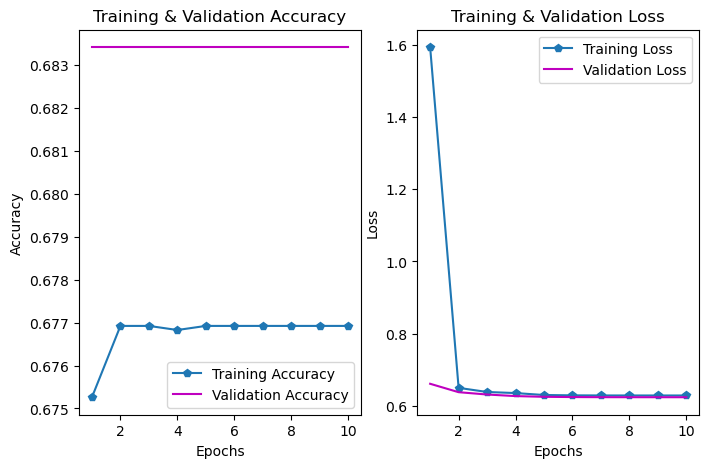

In [18]:
# Assuming you have already trained your model and have the `history` object
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(8, 5)

# Extract training and validation accuracy from the history object
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation accuracy with purple markers and solid line
ax[0].plot(epochs, train_acc, 'p-', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'm-', label='Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

# Extract training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss with purple markers and solid line
ax[1].plot(epochs, train_loss, 'p-', label='Training Loss')
ax[1].plot(epochs, val_loss, 'm-', label='Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()
